# D209 Assessment 2

# 1. Import Packages and Data

In [1]:
# Used to split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Used to work with dataframes
import pandas as pd

# Used to work with arrays
import numpy as np

# Used for data visualizations
from matplotlib import pyplot as plt
import seaborn as sns

# Classification model
from sklearn.ensemble import RandomForestRegressor

# Used for model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score

# Used for stepwise regression feature selection
import statsmodels.api as sm


# Used to build pipeline with steps to scale and fit models
from sklearn.pipeline import Pipeline

# Used for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [2]:
# Read in csv file into pandas dataframe "churn_df"
churn_df = pd.read_csv('churn_clean.csv')

In [3]:
# Inspect head of churn data
pd.set_option('display.max_columns',50)
churn_df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


# 2. Pre-processing

In [4]:
# List variables, null counts, and dtypes
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

#### Rename survey columns

In [5]:
# Create dictionary for survey variables that need to be renamed
churn_item_cols = {'Item1': 'Timely_Response',
                         'Item2': 'Timely_Fixes',
                         'Item3': 'Timely_Replacements',
                         'Item4': 'Reliability',
                         'Item5': 'Options',
                         'Item6': 'Respectful_Response',
                         'Item7': 'Courteous_Exchange',
                         'Item8': 'Active_Listening'}

# Rename variables
churn_df.rename(columns=churn_item_cols, inplace=True)

#### Convert categorical (yes/no) fields to binary numeric (1/0)

In [6]:
# Create list of columns to convert
converted_columns = ['Churn', 
                     'Techie', 
                     'Port_modem', 
                     'Tablet', 
                     'Phone', 
                     'Multiple', 
                     'OnlineSecurity', 
                     'OnlineBackup', 
                     'DeviceProtection', 
                     'TechSupport',
                     'StreamingTV', 
                     'StreamingMovies', 
                     'PaperlessBilling']
# Run for loop iterating through columns to convert, pass dictionary through map function to convert yes/no to 1/0
for i in converted_columns:
    churn_df[i] = churn_df[i].map({'Yes':1, 'No':0})

#### Convert categorical data to numeric with dummy variables

In [7]:
# Use pandas get dummies for categorical fields "Area", "Marital", "Gender", "Contract"
categorical_conversions = ['Area', 'Marital', 'Contract']
dummy_variables = ['Area_Rural', 'Area_Suburban',
                    'Area_Urban', 'Marital_Divorced', 'Marital_Married', 'Marital_Never Married',
                    'Marital_Separated', 'Marital_Widowed',
                    'Contract_Month-to-month', 'Contract_One year', 'Contract_Two Year']

churn_numeric = pd.get_dummies(churn_df, columns=categorical_conversions)

In [8]:
# Create dataframe with only numeric variables
churn_numeric = churn_numeric[[
                            'Population', 'Children', 'Age', 'Income', 'Churn', 'Outage_sec_perweek', 
                            'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Port_modem', 'Tablet',
                            'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                            'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Tenure',
                            'MonthlyCharge', 'Bandwidth_GB_Year', 'Timely_Response', 'Timely_Fixes',
                            'Timely_Replacements', 'Reliability', 'Options', 'Respectful_Response',
                            'Courteous_Exchange', 'Active_Listening', 'Area_Rural', 'Area_Suburban',
                            'Area_Urban', 'Marital_Divorced', 'Marital_Married', 'Marital_Never Married',
                            'Marital_Separated', 'Marital_Widowed','Contract_Month-to-month', 'Contract_One year', 
                            'Contract_Two Year'
                            ]]

#### Display summary statistics

In [9]:
churn_numeric.describe()

,Population,Children,Age,Income,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely_Response,Timely_Fixes,Timely_Replacements,Reliability,Options,Respectful_Response,Courteous_Exchange,Active_Listening,Area_Rural,Area_Suburban,Area_Urban,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Contract_Month-to-month,Contract_One year,Contract_Two Year
count,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9756.562400,2.0877,53.078400,39806.926771,0.265000,10.001848,12.016000,0.994200,0.398000,0.167900,0.483400,0.299100,0.906700,0.460800,0.357600,0.450600,0.438600,0.375000,0.492900,0.489000,0.588200,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600,0.332700,0.334600,0.332700,0.209200,0.191100,0.195600,0.201400,0.202700,0.545600,0.210200,0.244200
std,14432.698671,2.1472,20.698882,28199.916702,0.441355,2.976019,3.025898,0.988466,0.635953,0.373796,0.499749,0.457887,0.290867,0.498486,0.479317,0.497579,0.496241,0.484147,0.499975,0.499904,0.492184,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633,0.471204,0.471874,0.471204,0.406758,0.393187,0.396682,0.401066,0.402031,0.497941,0.407471,0.429633
min,0.000000,0.0000,18.000000,348.670000,0.000000,0.099747,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,738.000000,0.0000,35.000000,19224.717500,0.000000,8.018214,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2910.500000,1.0000,53.000000,33170.605000,0.000000,10.018560,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,13168.000000,3.0000,71.000000,53246.170000,1.000000,11.969485,14.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,61.479795,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,111850.000000,10.0000,89.000000,258900.700000,1.000000,21.207230,23.000000,7.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Visualize boxplots of continuous variables to investigate distribution of data and potential outliers

In [10]:
# Create dataframe of numeric non-binary variables
churn_anomaly_detect = churn_df[['Population', 'Children', 'Age', 
                         'Income', 'Outage_sec_perweek', 'Email', 
                         'Contacts', 'Yearly_equip_failure', 'Tenure', 
                         'MonthlyCharge', 'Bandwidth_GB_Year']]

# Standardize data by subtracting each value by its mean and then dividing by the standard deviation
churn_anomaly_detect_standardized = (churn_anomaly_detect - churn_anomaly_detect.mean())/churn_anomaly_detect.std()

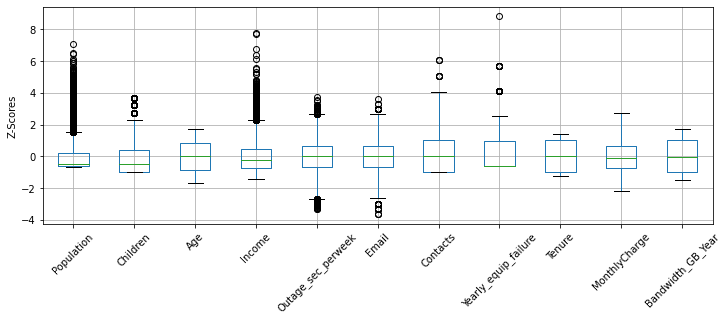

In [11]:
# Enlarge plot to fit all boxplots
fig, ax = plt.subplots(figsize=[12,4])

# Create boxplot of each variable
churn_anomaly_detect_standardized.boxplot()
# Rotate x labels
plt.xticks(rotation=45)
# Title y axis
plt.ylabel('Z-Scores')
plt.show()

# 3. Write function for model evaluation procedure

In [12]:
head_sep = '\n'+'='*100+'\n'*2
subhead_sep = '-'*60

def rfr_model_eval():
    
    y_pred_train = rfr.predict(X_train)
    y_pred_test = rfr.predict(X_test)
    
    # Accuracy tests of train and test
    print('Mean squared errors')
    print(subhead_sep) 
    print('MSE Train: {:.2f}'.format(mse(y_train, y_pred_train)))
    print('MSE Test: {:.2f}'.format(mse(y_test, y_pred_test)))
    print(head_sep)
    
    print('Test and train accuracy scores')
    print(subhead_sep)
    print('Accuracy Test: {:.2f}'.format(rfr.score(X_train, y_train)))
    print('Accuracy Train: {:.2f}'.format(rfr.score(X_test, y_test)))
    print(head_sep)
    
    print('')



# 4. Initial Random Forest Model

In [13]:
# Create arrays for dependent and independent variables
X = churn_numeric.drop('Bandwidth_GB_Year', axis=1).values
y = churn_numeric['Bandwidth_GB_Year']


# Split data between training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 24)

# Create random forest classifier
rfr = RandomForestRegressor()

# Fit the classifier to the training data
rfr.fit(X_train, y_train)

# Use knn model to predict X_test values for comparison to actual y_test values
y_pred = rfr.predict(X_test)

In [14]:
rfr_model_eval()

Mean squared errors
------------------------------------------------------------
MSE Train: 7184.20
MSE Test: 51210.83



Test and train accuracy scores
------------------------------------------------------------
Accuracy Test: 1.00
Accuracy Train: 0.99






# 5. Scaled feature model

In [15]:
from sklearn.preprocessing import StandardScaler

# Initialize standard scaler
scaler = StandardScaler() 
# Standardize and fit/ transform reduced dependent variables
X_stnd = scaler.fit_transform(X)

# Split data between training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_stnd, y, test_size=0.3, random_state = 24)

# Fit the classifier to the training data
rfr.fit(X_train, y_train)

# Use knn model to predict X_test values for comparison to actual y_test values
y_pred = rfr.predict(X_test)

In [16]:
rfr_model_eval()

Mean squared errors
------------------------------------------------------------
MSE Train: 7175.07
MSE Test: 51100.46



Test and train accuracy scores
------------------------------------------------------------
Accuracy Test: 1.00
Accuracy Train: 0.99






# 6. Feature selection

In [17]:
# Fit data to decision tree classifier
rfr.feature_importances_

array([7.41665054e-04, 1.03373822e-03, 1.75650869e-03, 7.56607578e-04,
       4.00609338e-04, 7.63157065e-04, 4.34278552e-04, 2.05582190e-04,
       1.19840973e-04, 6.53981013e-05, 9.58154019e-05, 9.37379770e-05,
       6.12861568e-05, 9.43600786e-05, 1.70247855e-04, 1.39181054e-04,
       1.46170012e-04, 9.33722699e-05, 6.53187347e-04, 2.83350303e-04,
       9.83597619e-05, 9.84501320e-01, 4.73785817e-03, 1.93314547e-04,
       1.98227843e-04, 2.13620266e-04, 2.23361571e-04, 2.41902851e-04,
       2.13249566e-04, 2.22520160e-04, 2.33118255e-04, 7.65797306e-05,
       7.74379879e-05, 7.06714712e-05, 7.48788759e-05, 7.09381022e-05,
       7.40307438e-05, 7.91640835e-05, 7.04164393e-05, 8.50900082e-05,
       6.63934110e-05, 6.94521812e-05])

In [18]:
# Create empty list to add features to
churn_features = []
# Create empty list to add feature importance scores to
churn_feature_scores = []
# Print title
print('Feature Importance Scores')
print('='*50+'\n')
# Iterate through enumerated list
for i, column in enumerate(churn_numeric.drop('Bandwidth_GB_Year', axis=1)):
    # Print column and feature importance scores
    print('{} --- {:0.3f}'.format(column, rfr.feature_importances_[i]))
    # Append features and scores to empty lists above for sorting
    churn_features.append(column)
    churn_feature_scores.append(rfr.feature_importances_[i])

Feature Importance Scores

Population --- 0.001
Children --- 0.001
Age --- 0.002
Income --- 0.001
Churn --- 0.000
Outage_sec_perweek --- 0.001
Email --- 0.000
Contacts --- 0.000
Yearly_equip_failure --- 0.000
Techie --- 0.000
Port_modem --- 0.000
Tablet --- 0.000
Phone --- 0.000
Multiple --- 0.000
OnlineSecurity --- 0.000
OnlineBackup --- 0.000
DeviceProtection --- 0.000
TechSupport --- 0.000
StreamingTV --- 0.001
StreamingMovies --- 0.000
PaperlessBilling --- 0.000
Tenure --- 0.985
MonthlyCharge --- 0.005
Timely_Response --- 0.000
Timely_Fixes --- 0.000
Timely_Replacements --- 0.000
Reliability --- 0.000
Options --- 0.000
Respectful_Response --- 0.000
Courteous_Exchange --- 0.000
Active_Listening --- 0.000
Area_Rural --- 0.000
Area_Suburban --- 0.000
Area_Urban --- 0.000
Marital_Divorced --- 0.000
Marital_Married --- 0.000
Marital_Never Married --- 0.000
Marital_Separated --- 0.000
Marital_Widowed --- 0.000
Contract_Month-to-month --- 0.000
Contract_One year --- 0.000
Contract_Two Yea

In [19]:
# Create dataframe with pandas and zip function from churn feature lists
churn_feature_scores_df = pd.DataFrame(zip(churn_features, churn_feature_scores), columns=['Feature', 'Feature Importance'])
# Sort and display dataframe in descending order by feature importance score
churn_feature_scores_df.sort_values('Feature Importance', ascending=False)

,Feature,Feature Importance
21,Tenure,0.984501
22,MonthlyCharge,0.004738
2,Age,0.001757
1,Children,0.001034
5,Outage_sec_perweek,0.000763
3,Income,0.000757
0,Population,0.000742
18,StreamingTV,0.000653
6,Email,0.000434
4,Churn,0.000401


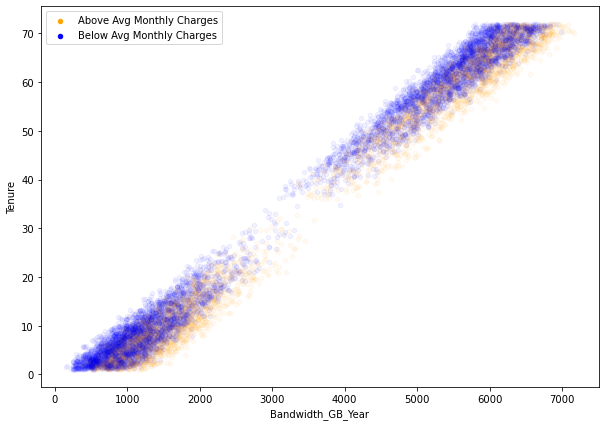

In [20]:
fig, ax = plt.subplots(figsize=(10,7))

high_mon_charge = churn_numeric[churn_numeric['MonthlyCharge'] >= np.mean(churn_numeric['MonthlyCharge'])]
low_mon_charge = churn_numeric[churn_numeric['MonthlyCharge'] < np.mean(churn_numeric['MonthlyCharge'])]

high_mon_charge.plot(kind='scatter', x='Bandwidth_GB_Year', y='Tenure', color='orange', ax=ax, alpha=0.05, label='Above Avg Monthly Charges')
low_mon_charge.plot(kind='scatter',x='Bandwidth_GB_Year', y='Tenure', color='blue', ax=ax, alpha=0.05, label='Below Avg Monthly Charges')
leg = plt.legend()    
for lh in leg.legendHandles: 
    lh.set_alpha(1)

plt.show()

#### Remove Tenure due to multicollinearity and re run model

In [21]:
# Create arrays for dependent and independent variables
X = churn_numeric.drop(['Bandwidth_GB_Year', 'Tenure'], axis=1).values
y = churn_numeric['Bandwidth_GB_Year']

X_stnd = scaler.fit_transform(X)

# Split data between training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_stnd, y, test_size=0.3, random_state = 24)

# Create random forest classifier
rfr = RandomForestRegressor()

# Fit the classifier to the training data
rfr.fit(X_train, y_train)

# Use knn model to predict X_test values for comparison to actual y_test values
y_pred = rfr.predict(X_test)

In [22]:
rfr_model_eval()

Mean squared errors
------------------------------------------------------------
MSE Train: 490224.10
MSE Test: 3520222.53



Test and train accuracy scores
------------------------------------------------------------
Accuracy Test: 0.90
Accuracy Train: 0.26






In [23]:
# Create empty list to add features to
churn_features = []
# Create empty list to add feature importance scores to
churn_feature_scores = []

for i, column in enumerate(churn_numeric.drop(['Bandwidth_GB_Year', 'Tenure'], axis=1)):
    # Append features and scores to empty lists above for sorting
    churn_features.append(column)
    churn_feature_scores.append(rfr.feature_importances_[i])
    
# Create dataframe with pandas and zip function from churn feature lists
churn_feature_scores_df = pd.DataFrame(zip(churn_features, churn_feature_scores), columns=['Feature', 'Feature Importance'])
# Sort and display dataframe in descending order by feature importance score
churn_feature_scores_df.sort_values('Feature Importance', ascending=False)

,Feature,Feature Importance
4,Churn,0.193441
21,MonthlyCharge,0.127765
5,Outage_sec_perweek,0.071984
0,Population,0.069597
3,Income,0.068936
2,Age,0.060363
6,Email,0.041285
1,Children,0.027803
38,Contract_Month-to-month,0.022550
29,Active_Listening,0.019991


# 7. Reduced Model

In [24]:
# Set independent variables
X = churn_numeric[['Churn', 'MonthlyCharge', 'Population', 'Outage_sec_perweek', 'Income', 'Age']].values
# Set dependent variable
y = churn_numeric['Bandwidth_GB_Year']

# Initialize standard scaler
scaler = StandardScaler() 
# Standardize and fit/ transform reduced dependent variables
X_stnd = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_stnd, y, test_size=0.3, random_state=24)

# Create random forest classifier
rfr = RandomForestRegressor()

# Fit the classifier to the training data
rfr.fit(X_train, y_train)

# Use knn model to predict X_test values for comparison to actual y_test values
y_pred = rfr.predict(X_test)

In [25]:
rfr_model_eval()

Mean squared errors
------------------------------------------------------------
MSE Train: 524733.19
MSE Test: 3675691.26



Test and train accuracy scores
------------------------------------------------------------
Accuracy Test: 0.89
Accuracy Train: 0.23






# 8. Tune hyperparameters

In [26]:
# Check hyperparameters of model
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### Use GridSearchCV to search for best value for n_neighbors

In [27]:
# Set steps for Pipeline - scaling and initialize model
steps = [('scaler', StandardScaler()), 
        ('rfr', RandomForestRegressor())]

# Call pipeline with steps
pipeline = Pipeline(steps)

# Set numpy range for candidate parameters (n_neighbors)
parameters = {'n_estimators': [10, 50, 100, 250, 500],
             'max_depth': [1, 2, 4, 8],
              'min_samples_split': [2,5]
             }

# Split testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

# Call GridSearchCV with pipeline and range of candidate n_neighbor values
cv = GridSearchCV(rfr, param_grid=parameters, cv=5)
# Fit cv to data
cv.fit(X_train, y_train)

KeyboardInterrupt: 

In [28]:
# Return best parameter for n_neighbors

print("Tuned Model Parameters: {}".format(cv.best_params_))

Tuned Model Parameters: {'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 250}


#### Plot candidate hyperparameters

In [29]:
train_scoreNum, test_scoreNum = validation_curve(rfr, 
                                                 X=X_train, y=y_train, 
                                                 param_name = 'n_estimators', 
                                                 param_range = [10, 50, 100, 250, 500],
                                                cv=5)

sns.set_theme()

plt.plot([10,50,100,250, 500], np.mean(train_scoreNum,axis=1), label='Training Score')
plt.plot([10,50,100,250, 500], np.mean(test_scoreNum,axis=1), label='CV Score')

plt.legend()
plt.title('N Estimators Validation Curve')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy Score')
plt.show()

KeyboardInterrupt: 

In [ ]:
train_scoreNum, test_scoreNum = validation_curve(rfr, 
                                                 X=X_train, y=y_train, 
                                                 param_name = 'max_depth', 
                                                 param_range = [1, 2, 4, 8],
                                                cv=5)

sns.set_theme()

plt.plot([1, 2, 4, 8], np.mean(train_scoreNum,axis=1), label='Training Score')
plt.plot([1, 2, 4, 8], np.mean(test_scoreNum,axis=1), label='CV Score')

plt.legend()
plt.title('N Estimators Validation Curve')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy Score')
plt.show()

# 10. Hyperparameter tuned model

In [30]:
# Set independent variables
X = churn_numeric[['Tenure', 'MonthlyCharge', 'Contract_Month-to-month', 'StreamingMovies']].values
# Set dependent variable
y = churn_numeric['Bandwidth_GB_Year']

X_train, X_test, y_train, y_test = train_test_split(X_stnd, y, test_size=0.3, random_state=24)

# Create random forest classifier, set n_estimators to 100 and max_depth to 4
rfr = RandomForestRegressor(n_estimators=250, max_depth=4, min_samples_split=2)

# Fit the classifier to the training data
rfr.fit(X_train, y_train)

# Use random forest model to predict X_test values for comparison to actual y_test values
y_pred = rfr.predict(X_test)

In [ ]:
rfr_model_eval()

#### Export data for assessment review

In [ ]:
# # Export cleaned dataset
# churn_numeric.to_csv('churn_clean_assessment_D209.csv', index=False)

In [ ]:
# # Set list of data and file names to iterate through
# array_to_df = [X_train, X_test, y_train, y_test]
# array_to_df_names = ['X_train', 'X_test', 'y_train', 'y_test']

# # Iterate through and convert test and train data from arrays to dataframes and save as csv files
# for x, xname in zip(array_to_df, array_to_df_names):
#     df = pd.DataFrame(x)
#     df.to_csv(xname+'.csv',index=False)